<a href="https://colab.research.google.com/github/rana-salah/Computational-Genomics-Class/blob/main/Assignment_1_~_Rana_Salah_Computational_Genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name: Rana Salah Khalel
### ID: 900182831

# Hypothesis
*************

Chromosomes don’t carry an equal number of variants, and chromosome size has a limited influence on the distribution.

## Justification:

The variants’ distribution within and between chromosomes is influenced by multiple factors. The main factor is the distribution of evolutionary conserved regions across the human genome. These conserved regions are less likely to have Single Nucleotide Polymorphisms (SNPs) due to either their important functional property or being a marker reflecting a common origin of species. Thus, the variants’ distribution will be shifted away from them. However, since these evolutionarily conserved sequences can be found across both gene-rich and gene-poor intervals, the gene content of chromosomes can’t solely explain the variants’ distribution in the genome. For example, chromosome 21 contains a large fraction of evolutionarily conserved elements that actually are non-coding regions. A second factor can be the gene distribution considering the evolutionarily conserved sequences in the gene-rich regions. In this matter, the genes are actually found to be non-randomly distributed in the genome. Thus, genes of similar function, similar expression profiles and common evolutionary origin are often clustered together. It was also reported that more than 2400 genes causing human monogenic inherited diseases are non-randomly distributed over and above the general nonrandomness in the genes distribution across the genome. Thus, since SNPs have been associated with multiple cases of these human monogenic diseases, it supports the fact that they may have a favored higher distribution in specific regions. Finally, for the chromosomal size, it is not expected to lead to higher variants’ distribution in chromosomes with longer lengths especially if the difference in their size is not too big. However, it may magnify the effect of having many evolutionarily conserved sequences in shorter chromosomes than in longer ones as the remaining regions will be limited. This magnification doesn’t mean any causality though.

# Analytical Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sample_NA12878 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/NA12878.tsv.gz?raw=true', compression='gzip')
chromosome_names = sample_NA12878['chr'].unique().tolist()

In [3]:
sizes = [248956422, 242193529, 198295559, 190214555, 181538259, 170805979, 159345973, 145138636, 138394717,
         133797422, 135086622, 133275309, 114364328, 107043718, 101991189, 90338345, 83257441, 80373285,
         58617616, 64444167, 46709983, 50818468, 156040895, 16569]

chromosome_sizes = {}
for i in range(24):
    chromosome_sizes[chromosome_names[i]] = sizes[i]

In [4]:
#Using value_counts() method
variants_count = sample_NA12878["chr"].value_counts()
variants_count

chr2     358140
chr1     341660
chr4     319510
chr3     296244
chr6     283652
chr5     272746
chr7     250035
chr8     229848
chr10    222282
chr11    221447
chr12    209175
chr9     189660
chr13    171720
chrX     149722
chr14    138570
chr16    132160
chr18    129078
chr15    126904
chr17    120051
chr19    101268
chr20     97451
chr21     65730
chr22     62361
chrM         20
Name: chr, dtype: int64

In [8]:
#Using the group_by() method
variants_count2 = sample_NA12878.groupby('chr').size()
variants_count2

chr
chr1     341660
chr10    222282
chr11    221447
chr12    209175
chr13    171720
chr14    138570
chr15    126904
chr16    132160
chr17    120051
chr18    129078
chr19    101268
chr2     358140
chr20     97451
chr21     65730
chr22     62361
chr3     296244
chr4     319510
chr5     272746
chr6     283652
chr7     250035
chr8     229848
chr9     189660
chrM         20
chrX     149722
dtype: int64

In [16]:
#Using a boolean mask
count= {}
for index in range (0,24):
    mask = sample_NA12878['chr'] == chromosome_names[index]
    count[chromosome_names[index]] = len(sample_NA12878[mask])
count

{'chr1': 341660,
 'chr2': 358140,
 'chr3': 296244,
 'chr4': 319510,
 'chr5': 272746,
 'chr6': 283652,
 'chr7': 250035,
 'chr8': 229848,
 'chr9': 189660,
 'chr10': 222282,
 'chr11': 221447,
 'chr12': 209175,
 'chr13': 171720,
 'chr14': 138570,
 'chr15': 126904,
 'chr16': 132160,
 'chr17': 120051,
 'chr18': 129078,
 'chr19': 101268,
 'chr20': 97451,
 'chr21': 65730,
 'chr22': 62361,
 'chrX': 149722,
 'chrM': 20}

#Visual Testing

In [42]:
def plot_variant_counts(chromosomes_dict):
    fig = plt.figure(figsize=(15,3))
    plt.bar(chromosomes_dict.keys(), chromosomes_dict.values(), color= 'maroon', width= 0.5)
    plt.xlabel('Chromosome')
    plt.ylabel('Variant Count')
    plt.title('Variant Counts per Chromosome')
    plt.show()

In [43]:
def plot_chromosomes_sizes(chromosome_sizes):
    keys = chromosome_sizes.keys()
    values = chromosome_sizes.values()
    fig = plt.figure(figsize=(15,3))
    plt.bar(keys, values, color = 'navy', width = 0.5)
    plt.xlabel('Chromosome')
    plt.ylabel('Chromosome Lenght')
    plt.title('Chromosomes Sizes')
    plt.show()

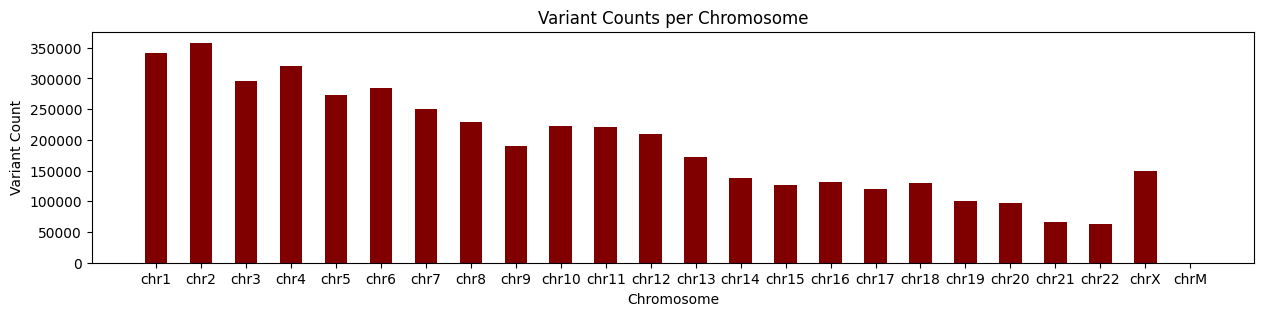

In [44]:
plot_variant_counts(count)

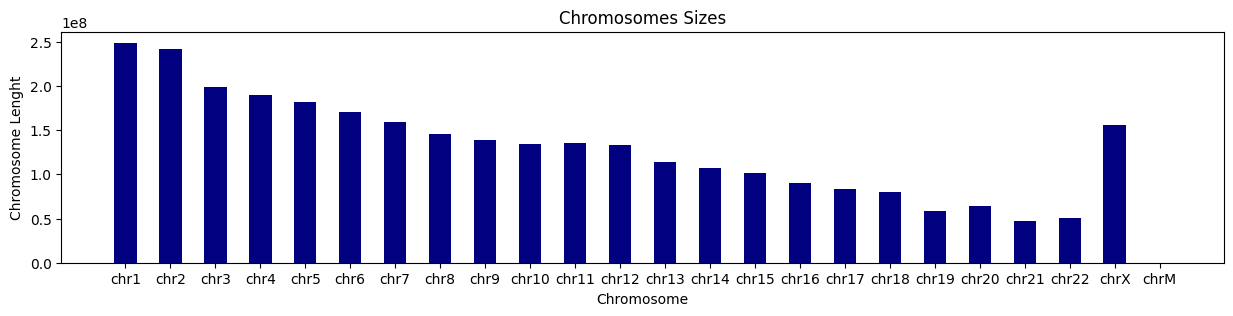

In [45]:
plot_chromosomes_sizes(chromosome_sizes)

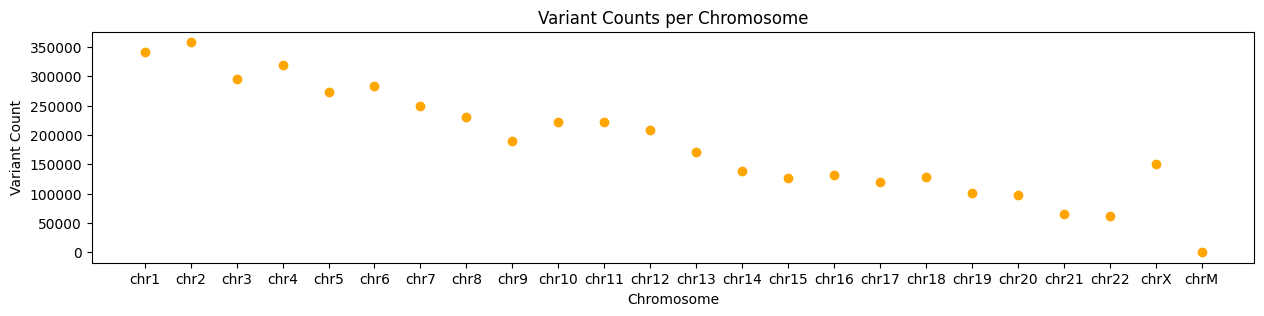

In [41]:
def plot_variant_counts_scatter(chromosomes_dict):
    fig = plt.figure(figsize=(15,3))
    plt.scatter(chromosomes_dict.keys(), chromosomes_dict.values(), color= 'orange')
    plt.xlabel('Chromosome')
    plt.ylabel('Variant Count')
    plt.title('Variant Counts per Chromosome')
    plt.show()
plot_variant_counts_scatter(count)

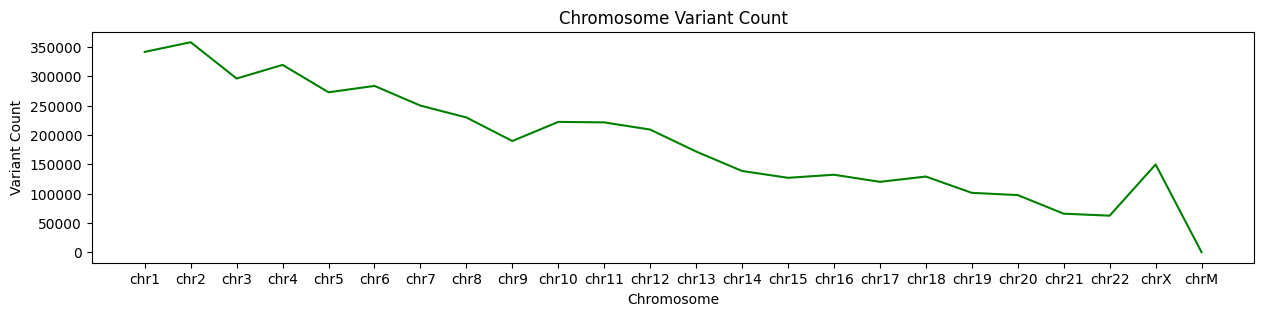

In [39]:
def line_chart(chromosome_dict):
    keys = chromosome_dict.keys()
    values = chromosome_dict.values()
    fig = plt.figure(figsize=(15,3))
    plt.plot(keys, values, color ='green')
    plt.xlabel("Chromosome")
    plt.ylabel("Variant Count")
    plt.title("Chromosome Variant Count")
    plt.show()  # show first chart

line_chart(count)

#Hypothesis Analytical & Visual Testing Conclusion
******

Analysing the calculated number of variants per each chromosome and the associated plots (bar plot, scatter plot and line chart), they cleary match the initial hypothesis that the variants' distribution are different between the chromosomes. In addiiton, the chromosome size doens't control this distribution as having a larger size doesn't essentially mean having more variants. This can be recognized through comparing the maroon and navy bar plots. For example, chromosomes such as chromosome 2, chromosome 4, chromosome 6, chromosome 16 and chromosome 18 have higher number of variants compared to other chromosomes with larger sizes than them. However, there as a limited effect of the chromosome size as we predicted as the curve of the variant counts, mostly, starts to drop down as the chromosome sizes decrease.

   Chromosome  Variant Count
0        chr1         341660
1        chr2         358140
2        chr3         296244
3        chr4         319510
4        chr5         272746
5        chr6         283652
6        chr7         250035
7        chr8         229848
8        chr9         189660
9       chr10         222282
10      chr11         221447
11      chr12         209175
12      chr13         171720
13      chr14         138570
14      chr15         126904
15      chr16         132160
16      chr17         120051
17      chr18         129078
18      chr19         101268
19      chr20          97451
20      chr21          65730
21      chr22          62361
22       chrX         149722
23       chrM             13


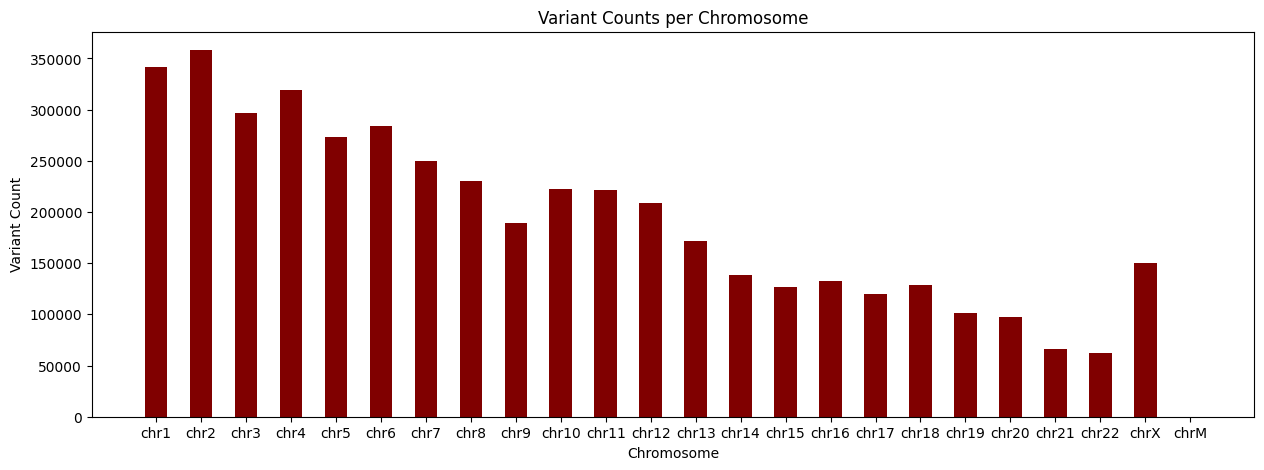

In [ ]:
#A very bad idea that finally worked somehow!

#Explanation: I wanted to use the same code used last class to calculate the variants density to check its efficacy
#in covering the total number of SNPs in all the chromosomes and how the window size and step actually affect it.
#Conclusion: The code was able to get the number of variants in all chromosomes correct except for chrM since it
#has the smallest chromosome size, so it requires smaller window and step Sizes
#The closest result (19 variants) was obtained by using a window size = 1000 and step = 100
#However, these optimal sizes were not used in this final version of the code as it takes a huge time to be processed.

windows = pd.DataFrame(columns=['window', 'number_of_snps'])

def calculate_variants_sliding_window(current_chromosome, chromosome_size):
    window_size = 10000
    step_size = 1000

    window_index = 0
    start = 1
    window_start = start
    windows = pd.DataFrame(columns=['window', 'number_of_snps'])  # Reset windows DataFrame

    while window_start + window_size - 1 <= chromosome_size:
        window_end = window_start + window_size - 1
        snps_count = ((current_chromosome['pos'] >= window_start) & (current_chromosome['pos'] < window_end)).sum()
        windows.loc[window_index] = [window_start, snps_count]
        window_start = window_end
        window_index +=1

    variants = windows['number_of_snps'].sum()
    return variants

def calculate_variant_counts(chromosome_sizes):
    variant_counts = {}

    for chromosome, size in chromosome_sizes.items():
        current_chromosome = sample_NA12878.loc[sample_NA12878['chr'] == chromosome]
        variant_counts[chromosome] = calculate_variants_sliding_window(current_chromosome, size)

    variants_df = pd.DataFrame({'Chromosome': list(variant_counts.keys()),
                                'Variant Count': list(variant_counts.values())})

    print(variants_df)

    plot_variant_counts(chromosome_sizes, variant_counts)

def plot_variant_counts(chromosome_sizes, variant_counts):
    fig = plt.figure(figsize=(15,5))
    plt.bar(chromosome_sizes.keys(), variant_counts.values(), color= 'maroon', width= 0.5)
    plt.xlabel('Chromosome')
    plt.ylabel('Variant Count')
    plt.title('Variant Counts per Chromosome')
    plt.show()

calculate_variant_counts(chromosome_sizes)